# Clustering Premier League Playing Styles ⚽️
#### Name: Ryan O'Connor 
#### Student No: d22124479
#### Course: TU257 
This notebook will focus on the application of clustering to gain insights into the playing styles of professinal football players. I am doing some work experience with a football data start-up that focuses on underage leagues (u13-u19). The method and algorithm used here can be implemented for teams that subscribe to the data platform. 

## 1. Defining the problem and describing the datasets
Machine Learning (ML) has become vital in modern football. ML methods can provide valuable insights into team performance, individual playing styles and managerial systems. Clustering is one of these methods. Football pundits often rank players based on legends in their position. An example is the frequent comparison in the English media of high-performing young midfielders to Steven Gerrard or Paul Scholes. But can we define these roles beyond simply pure punditry? Clustering takes a data-focused approach that can have the following benefits for teams. 
 
1. Clustering can be used to group players who exhibit similar in-field behaviour. These data are crucial to examine how a player would fit into a particular playing style or managerial system. By clustering players according to their styles, coaches and analysts can gain insights into team dynamics, identify areas of strength and weakness, and make data-driven decisions to improve performance. 

2. Clustered data can be used to add a quantitative basis to scouting reports. 

3. Harnessing our inner Moneyball, clustering can be used to look past the media and market hype of particular players to allow teams to save money when purchasing players. For example, why spend fifty million on a striker when the striker worth half the price has the same playing style and performance?

Much of the literature focuses on clustering playing styles based on the popular football video game by EA Sport 'Fifa', e.g. (Akif Md Ali et al., 2022; Soto-Valero, 2017). While this method can be valuable, the main limitation is that the video game has a somewhat subjective rating system. Thus, clustering will inaccurately place players in lower-performing categories, even if their real-life performance suggests they should be in a different cluster. This project will scrape data from fbref.com, the most prominent football stats website, for the 'Big 5' European football leagues; The Premier League (England), La Liga (Spain), Ligue 1 (France), Bundesliga (Germany) and Serie A (Italy). This will allow the clustering to be based on real-world data for the entirety of the last completed season (2021-2022). 

Key performance metrics of every player in the top 5 leagues for the last fully completed season will be used in the clustering models. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import time 

#### 1.1 Reading the data
##### NOTE: DO NOT UNCOMMENT THE FIRST CELL, RUN THE PROGRAM FROM THE SECOND CELL ONWARDS. 
To get the data originally, the pandas read_html method was used, as seen in the cell directly below. This required passing the links for the 98 teams directly to the method. This is by no means the prettiest way to get the data by webscraping, however, it is my experience that fbref.com can block users who attempt to make too many requests to their domain using beautiful soup. The pandas method is more reliable, however, when passing 98 urls to the method, fbref.com will still block the user from collecting these data. 

A workaround to this is to use a VPN, and get the program to sleep for anywhere between 1 to 10 seconds after making every html request. Despite this, there can still be issues. 

The data were written to CSV's, and the code encased in an exception handling. This has solved the issue and allowed for reproducability. Please don't run the code that the scrapes the data as it causes an issue with how the clusters are distributed, which messes up the inferences I am making in my analysis. I have left the code in the cell below to show you how the process was carried out, and the code will run with no issues. But the scraped data have a different double header layout than the csv data do, which appears to be messing with the way the data are laid out when passed to the clustering model, thus, effecting the clusters.

The data from the CSV files were written from the webscraping data, thus they are the exact same data. However, it is more reliable to run the program with data from the CSV files. I have just left the code shown below for a reference as to how the data were retrieved. 

In [3]:
# team_url= {
#             # Premier League 
#             "Man City": "https://fbref.com/en/squads/b8fd03ef/2021-2022/Manchester-City-Stats",
#             "Man Utd": "https://fbref.com/en/squads/19538871/2021-2022/Manchester-United-Stats",
#             "Liverpool": "https://fbref.com/en/squads/822bd0ba/2021-2022/Liverpool-Stats",
#             "Chelsea": "https://fbref.com/en/squads/cff3d9bb/2021-2022/Chelsea-Stats" ,
#             "Arsenal": "https://fbref.com/en/squads/18bb7c10/2021-2022/Arsenal-Stats",
#             "Tottenham": "https://fbref.com/en/squads/361ca564/2021-2022/Tottenham-Hotspur-Stats",
#             "West Ham": "https://fbref.com/en/squads/7c21e445/2021-2022/West-Ham-United-Stats",
#             "Leicester": "https://fbref.com/en/squads/a2d435b3/2021-2022/Leicester-City-Stats",
#             "Brighton": "https://fbref.com/en/squads/d07537b9/2021-2022/Brighton-and-Hove-Albion-Stats",
#             "Wolves": "https://fbref.com/en/squads/8cec06e1/2021-2022/Wolverhampton-Wanderers-Stats",
#             "Newcastle": "https://fbref.com/en/squads/b2b47a98/2021-2022/Newcastle-United-Stats",
#             "Crystal Palace": "https://fbref.com/en/squads/47c64c55/2021-2022/Crystal-Palace-Stats",
#             "Brentford": "https://fbref.com/en/squads/cd051869/2021-2022/Brentford-Stats", 
#             "Aston Villa": "https://fbref.com/en/squads/8602292d/2021-2022/Aston-Villa-Stats",
#             "Southampton":"https://fbref.com/en/squads/33c895d4/2021-2022/Southampton-Stats",
#             "Everton": "https://fbref.com/en/squads/d3fd31cc/2021-2022/Everton-Stats",
#             "Leeds Utd": "https://fbref.com/en/squads/5bfb9659/2021-2022/Leeds-United-Stats",
#             "Burnley": "https://fbref.com/en/squads/943e8050/2021-2022/Burnley-Stats", 
#             "Watford": "https://fbref.com/en/squads/2abfe087/2021-2022/Watford-Stats", 
#             "Norwich": "https://fbref.com/en/squads/1c781004/2021-2022/Norwich-City-Stats" ,
#             # La Liga
#             "Real Madrid": "https://fbref.com/en/squads/53a2f082/2021-2022/Real-Madrid-Stats",
#             "Barcelona": "https://fbref.com/en/squads/206d90db/2021-2022/Barcelona-Stats",
#             "Atletico": "https://fbref.com/en/squads/db3b9613/2021-2022/Atletico-Madrid-Stats",
#             "Sevilla": "https://fbref.com/en/squads/ad2be733/2021-2022/Sevilla-Stats",
#             "Betis": "https://fbref.com/en/squads/fc536746/2021-2022/Real-Betis-Stats",
#             "Real Sociedad": "https://fbref.com/en/squads/e31d1cd9/2021-2022/Real-Sociedad-Stats",
#             "Villareal": "https://fbref.com/en/squads/2a8183b3/2021-2022/Villarreal-Stats",
#             "Bilbao": "https://fbref.com/en/squads/2b390eca/2021-2022/Athletic-Club-Stats",
#             "Valencia": "https://fbref.com/en/squads/dcc91a7b/2021-2022/Valencia-Stats",
#             "Osasuna": "https://fbref.com/en/squads/03c57e2b/2021-2022/Osasuna-Stats",
#             "Celta Vigo": "https://fbref.com/en/squads/f25da7fb/2021-2022/Celta-Vigo-Stats",
#             "Rayo Vallecano": "https://fbref.com/en/squads/98e8af82/2021-2022/Rayo-Vallecano-Stats",
#             "Elche": "https://fbref.com/en/squads/6c8b07df/2021-2022/Elche-Stats",
#             "Espanyol": "https://fbref.com/en/squads/a8661628/2021-2022/Espanyol-Stats",
#             "Getafe" : "https://fbref.com/en/squads/7848bd64/2021-2022/Getafe-Stats",
#             "Mallorca": "https://fbref.com/en/squads/2aa12281/2021-2022/Mallorca-Stats",
#             "Cadiz": "https://fbref.com/en/squads/ee7c297c/2021-2022/Cadiz-Stats",
#             "Granada": "https://fbref.com/en/squads/a0435291/2021-2022/Granada-Stats",
#             "Levante": "https://fbref.com/en/squads/9800b6a1/2021-2022/Levante-Stats",
#             "Alaves": "https://fbref.com/en/squads/8d6fd021/2021-2022/Alaves-Stats",
#             # Serie A 
#             "Milan": "https://fbref.com/en/squads/dc56fe14/2021-2022/Milan-Stats",
#             "Inter": "https://fbref.com/en/squads/d609edc0/2021-2022/Internazionale-Stats",
#             "Napoli": "https://fbref.com/en/squads/d48ad4ff/2021-2022/Napoli-Stats",
#             "Juventus": "https://fbref.com/en/squads/e0652b02/2021-2022/Juventus-Stats",
#             "Lazio": "https://fbref.com/en/squads/7213da33/2021-2022/Lazio-Stats",
#             "Roma": "https://fbref.com/en/squads/cf74a709/2021-2022/Roma-Stats",
#             "Fiorentina": "https://fbref.com/en/squads/421387cf/2021-2022/Fiorentina-Stats",
#             "Atalanta":"https://fbref.com/en/squads/922493f3/2021-2022/Atalanta-Stats",
#             "Verona": "https://fbref.com/en/squads/0e72edf2/2021-2022/Hellas-Verona-Stats",
#             "Torino": "https://fbref.com/en/squads/105360fe/2021-2022/Torino-Stats",
#             "Sassuolo": "https://fbref.com/en/squads/e2befd26/2021-2022/Sassuolo-Stats",
#             "Udinese": "https://fbref.com/en/squads/04eea015/2021-2022/Udinese-Stats",
#             "Bologna": "https://fbref.com/en/squads/1d8099f8/2021-2022/Bologna-Stats",
#             "Empoli": "https://fbref.com/en/squads/a3d88bd8/2021-2022/Empoli-Stats",
#             "Sampadoria": "https://fbref.com/en/squads/8ff9e3b3/2021-2022/Sampdoria-Stats",
#             "Spezia": "https://fbref.com/en/squads/68449f6d/2021-2022/Spezia-Stats",
#             "Salernitana": "https://fbref.com/en/squads/c5577084/2021-2022/Salernitana-Stats",
#             "Cagliari": "https://fbref.com/en/squads/c4260e09/2021-2022/Cagliari-Stats",
#             "Genoa": "https://fbref.com/en/squads/658bf2de/2021-2022/Genoa-Stats",
#             "Venezia": "https://fbref.com/en/squads/af5d5982/2021-2022/Venezia-Stats",
#             # Bundesliga 
#             "Bayern": "https://fbref.com/en/squads/054efa67/2021-2022/Bayern-Munich-Stats",
#             "Dortmund": "https://fbref.com/en/squads/add600ae/2021-2022/Dortmund-Stats",
#             "Leverkusen": "https://fbref.com/en/squads/c7a9f859/2021-2022/Bayer-Leverkusen-Stats",
#             "Leipzig": "https://fbref.com/en/squads/acbb6a5b/2021-2022/RB-Leipzig-Stats",
#             "Union Berlin": "https://fbref.com/en/squads/7a41008f/2021-2022/Union-Berlin-Stats",
#             "Freiburg": "https://fbref.com/en/squads/a486e511/2021-2022/Freiburg-Stats",
#             "Koln": "https://fbref.com/en/squads/bc357bf7/2021-2022/Koln-Stats",
#             "Mainz": "https://fbref.com/en/squads/a224b06a/2021-2022/Mainz-05-Stats",
#             "Hoffenheim": "https://fbref.com/en/squads/033ea6b8/2021-2022/Hoffenheim-Stats",
#             "Monchengladbach":"https://fbref.com/en/squads/32f3ee20/2021-2022/Monchengladbach-Stats",
#             "Frankfurt": "https://fbref.com/en/squads/f0ac8ee6/2021-2022/Eintracht-Frankfurt-Stats",
#             "Wolfsburg": "https://fbref.com/en/squads/4eaa11d7/2021-2022/Wolfsburg-Stats",
#             "Bochum": "https://fbref.com/en/squads/b42c6323/2021-2022/Bochum-Stats",
#             "Augsburg": "https://fbref.com/en/squads/0cdc4311/2021-2022/Augsburg-Stats",
#             "Stuttgart":"https://fbref.com/en/squads/598bc722/2021-2022/Stuttgart-Stats",
#             "Hertha BSC": "https://fbref.com/en/squads/2818f8bc/2021-2022/Hertha-BSC-Stats",
#             "Arminia": "https://fbref.com/en/squads/247c4b67/2021-2022/Arminia-Stats",
#             "Furth": "https://fbref.com/en/squads/12192a4c/2021-2022/Greuther-Furth-Stats",
#             # Ligue 1 
#             "PSG":"https://fbref.com/en/squads/e2d8892c/Paris-Saint-Germain-Stats",
#             "Marseille": "https://fbref.com/en/squads/5725cc7b/Marseille-Stats",
#             "Lens": "https://fbref.com/en/squads/fd4e0f7d/Lens-Stats",
#             "Monaco": "https://fbref.com/en/squads/fd6114db/Monaco-Stats",
#             "Lille": "https://fbref.com/en/squads/cb188c0c/Lille-Stats",
#             "Rennes": "https://fbref.com/en/squads/b3072e00/Rennes-Stats",
#             "Lyon": "https://fbref.com/en/squads/d53c0b06/Lyon-Stats",
#             "Reims": "https://fbref.com/en/squads/7fdd64e0/Reims-Stats",
#             "Clermont": "https://fbref.com/en/squads/d9676424/Clermont-Foot-Stats",
#             "Nice": "https://fbref.com/en/squads/132ebc33/Nice-Stats",
#             "Lorient": "https://fbref.com/en/squads/d2c87802/Lorient-Stats",
#             "Toulouse": "https://fbref.com/en/squads/3f8c4b5f/Toulouse-Stats",
#             "Montpellier": "https://fbref.com/en/squads/281b0e73/Montpellier-Stats",
#             "Auxerre": "https://fbref.com/en/squads/5ae09109/Auxerre-Stats",
#             "Strasbourg": "https://fbref.com/en/squads/c0d3eab4/Strasbourg-Stats",
#             "Nantes": "https://fbref.com/en/squads/d7a486cd/Nantes-Stats",
#             "Brest": "https://fbref.com/en/squads/fb08dbb3/Brest-Stats",
#             "Troyes": "https://fbref.com/en/squads/54195385/Troyes-Stats",
#             "Ajaccio": "https://fbref.com/en/squads/7a54bb4f/Ajaccio-Stats",
#             "Angers": "https://fbref.com/en/squads/69236f98/Angers-Stats"
#         }
# # Initialize an empty dataframe to store all the data
# standard_data = pd.DataFrame()
# passing_data = pd.DataFrame() 
# shooting_data = pd.DataFrame()
# creation_data = pd.DataFrame() 
# defense_data = pd.DataFrame() 

# try:   
#         # Loop over the dictionary of URLs
#     for team, url in team_url.items():

#         # Read the HTML table from the URL using pandas
#         dfs = pd.read_html(url)

#         # Access the index of the dataframe in the list
#         standard = dfs[0]
#         shooting = dfs[4]
#         passing = dfs[5] 
#         creation = dfs[7] 
#         defense = dfs[8] 

#         # Concatanate to our dataframes initialized above
#         standard_data = pd.concat([standard_data, standard])
#         shooting_data = pd.concat([shooting_data,shooting])
#         passing_data = pd.concat([passing_data,passing])
#         creation_data = pd.concat([creation_data,creation])
#         defense_data = pd.concat([defense_data,defense])

#         # Sleep to prevent HTTP Error 
#         time.sleep(1)

# except Exception as ex:
#     print(ex) 
#     print("Reading CSV's")
#     standard_data = pd.read_csv("standard.csv")
#     shooting_data = pd.read_csv("shooting.csv")
#     passing_data = pd.read_csv("passing.csv")
#     creation_data = pd.read_csv("creation.csv")
#     defense_data = pd.read_csv("defense.csv")
#     # Need to make the multilevel index header for the csv files. This is needed for filtering
#     standard_header = list(standard_data.iloc[0])
#     shooting_header = list(shooting_data.iloc[0])
#     passing_header = list(passing_data.iloc[0])
#     creation_header = list(creation_data.iloc[0])
#     defense_header = list(defense_data.iloc[0])


#     # Create a new dataframe without the first row 
#     standard_data = standard_data[1:]
#     shooting_data = shooting_data[1:]
#     passing_data = passing_data[1:]
#     creation_data = creation_data[1:]
#     defense_data = defense_data[1:]

#     # Create a multi-level column header with the first row as the second level 
#     standard_data.columns = pd.MultiIndex.from_arrays([standard_data.columns,standard_header])
#     shooting_data.columns = pd.MultiIndex.from_arrays([shooting_data.columns,shooting_header])
#     passing_data.columns = pd.MultiIndex.from_arrays([passing_data.columns,passing_header])
#     creation_data.columns = pd.MultiIndex.from_arrays([creation_data.columns,creation_header])
#     defense_data.columns = pd.MultiIndex.from_arrays([defense_data.columns,defense_header])

#     # Reset the index 
#     standard_data = standard_data.reset_index(drop=True) 
#     shooting_data = shooting_data.reset_index(drop=True) 
#     passing_data = passing_data.reset_index(drop=True) 
#     creation_data = creation_data.reset_index(drop=True) 
#     defense_data = defense_data.reset_index(drop=True) 


Please run the program from here 

In [4]:
standard_data = pd.read_csv("standard.csv")
shooting_data = pd.read_csv("shooting.csv")
passing_data = pd.read_csv("passing.csv")
creation_data = pd.read_csv("creation.csv")
defense_data = pd.read_csv("defense.csv")

# Need to make the multilevel index header for the csv files. This is needed for filtering
standard_header = list(standard_data.iloc[0])
shooting_header = list(shooting_data.iloc[0])
passing_header = list(passing_data.iloc[0])
creation_header = list(creation_data.iloc[0])
defense_header = list(defense_data.iloc[0])

# Create a new dataframe without the first row 
standard_data = standard_data[1:]
shooting_data = shooting_data[1:]
passing_data = passing_data[1:]
creation_data = creation_data[1:]
defense_data = defense_data[1:]

# Create a multi-level column header with the first row as the second level 
standard_data.columns = pd.MultiIndex.from_arrays([standard_data.columns,standard_header])
shooting_data.columns = pd.MultiIndex.from_arrays([shooting_data.columns,shooting_header])
passing_data.columns = pd.MultiIndex.from_arrays([passing_data.columns,passing_header])
creation_data.columns = pd.MultiIndex.from_arrays([creation_data.columns,creation_header])
defense_data.columns = pd.MultiIndex.from_arrays([defense_data.columns,defense_header])

# Reset the index 
standard_data = standard_data.reset_index(drop=True) 
shooting_data = shooting_data.reset_index(drop=True) 
passing_data = passing_data.reset_index(drop=True) 
creation_data = creation_data.reset_index(drop=True) 
defense_data = defense_data.reset_index(drop=True) 

## 2. Data Insights and Preparation

#### 2.1 Filtering the required data via the upper column headers, and then removing these headers


Standard Data: \
The standard stats will be analysed at the performance level, Per 90 mins, Expected and Progression levels can be dropped. The Playing time level will also be included in the analysis. 

Shooting Data:\
The shooting data will be analysed at the "Standard Level", thus the "Expected" upper column can be discounted.  

Passing Data:\
The passing data will be analysed at the total level, the pass distances levels can be discounted. 

Goal and Shot Creation:\
This will be analysed at the SCA (Shot Creation) and GCA (Goal Creation) levels. The SCA and GCA Types levels can be ommitted. 

Defensive:\
This analysis will only be looking at Tackles and Blocks, other levels can be ommitted. 


The if/else statement in this cell was used to prevent an error being thrown if the data read were from the CSV or from reading the html. When the data were written to a CSV, the upper column header was divided into subsections, thus "Performance" became "Performance.1", "Performance.2", etc. 

In [5]:
if "Performance.1" in standard_data.columns:
    # Pass the required upper columns to an index 
    standard_data = standard_data[["Unnamed: 0_level_0","Unnamed: 2_level_0","Unnamed: 3_level_0","Playing Time","Performance",
                                   "Performance.1","Performance.2","Performance.3","Performance.4","Performance.5","Performance.6","Performance.7"]]
    shooting_data = shooting_data[['Unnamed: 0_level_0','Standard','Standard.1','Standard.2','Standard.3','Standard.4','Standard.5',
                                   'Standard.6','Standard.7','Standard.8','Standard.9','Standard.10','Standard.11']] 
    passing_data = passing_data[['Unnamed: 0_level_0','Total','Total.1','Total.2','Total.3','Total.4']]
    creation_data = creation_data[['Unnamed: 0_level_0','SCA','SCA.1','GCA','GCA.1']]
    defense_data = defense_data[['Unnamed: 0_level_0','Tackles','Tackles.1','Tackles.2','Tackles.3','Tackles.4','Blocks','Blocks.1','Blocks.2']]

else: 
    # Pass the required upper columns to an index 
    standard_data = standard_data[["Unnamed: 0_level_0","Unnamed: 2_level_0","Unnamed: 3_level_0","Playing Time","Performance"]]
    shooting_data = shooting_data[['Unnamed: 0_level_0','Standard']] 
    passing_data = passing_data[['Unnamed: 0_level_0','Total']]
    creation_data = creation_data[['Unnamed: 0_level_0','SCA','GCA']]
    defense_data = defense_data[['Unnamed: 0_level_0','Tackles','Blocks']]

In [6]:
# Drop the upper level 
standard_data.columns = standard_data.columns.droplevel()
shooting_data.columns = shooting_data.columns.droplevel()
passing_data.columns = passing_data.columns.droplevel() 
creation_data.columns = creation_data.columns.droplevel()
defense_data.columns = defense_data.columns.droplevel()

Drop duplicates 

In [7]:
df_list = [standard_data,shooting_data,passing_data,creation_data,defense_data]

for df in df_list:
    df.drop_duplicates(subset='Player', keep='first', inplace=True)

#### 2.2 Merging dataframes 

In [8]:
from functools import reduce 
all_data = pd.merge(standard_data,shooting_data,on='Player',how='outer')
new_df_list = [passing_data,creation_data,defense_data]
data_merge = reduce(lambda left, right:     # Merge DataFrames in list
                     pd.merge(left , right,
                              on = ["Player"],
                              how = "outer"),
                     new_df_list)

all_data = pd.merge(all_data,data_merge,on="Player",how="outer")

In [9]:
all_data

,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Sh_y,Pass
0,Ederson,GK,27.0,37,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.03,2.0,1,2.0,0.0,0.0,0.0,0.0,0.0
1,João Cancelo,DF,27.0,36,1.0,7.0,8.0,1.0,0.0,0.0,...,18.0,0.5,83.0,54,33.0,35.0,15.0,25.0,3.0,22.0
2,Rodri,MF,25.0,33,7.0,2.0,9.0,7.0,0.0,0.0,...,6.0,0.19,72.0,43,24.0,38.0,10.0,28.0,5.0,23.0
3,Bernardo Silva,"MF,FW",26.0,33,8.0,4.0,12.0,8.0,0.0,0.0,...,17.0,0.54,57.0,29,19.0,19.0,19.0,24.0,2.0,22.0
4,Aymeric Laporte,DF,27.0,33,4.0,0.0,4.0,4.0,0.0,0.0,...,6.0,0.19,33.0,15,22.0,10.0,1.0,15.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Yassin Belkhdim,MF,21-073,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3354,Théo Borne,GK,20-287,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3355,Yacine Gaya,DF,18-164,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3356,Noah Guede-Nadje,MF,19-167,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
if "MP" not in all_data.columns: 
    all_data.iloc[:, 3:] = all_data.iloc[:, 3:].astype(float)

/var/folders/l1/kb_t3jk17fn21h4x3hr3n3ch0000gn/T/ipykernel_35835/2711057445.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  all_data.iloc[:, 3:] = all_data.iloc[:, 3:].astype(float)


In [11]:
all_data.columns

Index(['Player', 'Pos', 'Age', 'Starts', 'Gls_x', 'Ast', 'G+A', 'G-PK', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'Gls_y', 'Sh_x', 'SoT', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_y', 'PKatt_y', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'SCA', 'SCA90', 'GCA', 'GCA90',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Blocks', 'Sh_y',
       'Pass'],
      dtype='object')

Remove the Squad Total and Opponent Total from the Players columns 

In [12]:
all_data = all_data[~all_data['Player'].isin(['Squad Total', 'Opponent Total'])]

Drop Goalkeepers from the data. Goalkeepers tend to have their own specialised metrics for performance, and the metrics used in this dataset are not well suited to analysing their performance. Their presence in the data may effect the clusters so it is better to remove them. 

In [13]:
all_data = all_data[all_data['Pos']!='GK']

#### 2.3 Performing descriptive statistics

In [14]:
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Starts,2966.0,11.238705,11.114019,0.0,0.00,8.00,20.000,38.0
Gls_x,2505.0,1.771657,3.176855,0.0,0.00,1.00,2.000,35.0
Ast,2505.0,1.260279,2.019701,0.0,0.00,0.00,2.000,18.0
G+A,2505.0,3.031936,4.587168,0.0,0.00,1.00,4.000,39.0
G-PK,2505.0,1.609980,2.821780,0.0,0.00,0.00,2.000,30.0
PK_x,2505.0,0.161677,0.716510,0.0,0.00,0.00,0.000,9.0
PKatt_x,2505.0,0.205190,0.862452,0.0,0.00,0.00,0.000,13.0
CrdY,2505.0,2.691018,2.737945,0.0,0.00,2.00,4.000,16.0
CrdR,2505.0,0.124152,0.369779,0.0,0.00,0.00,0.000,3.0
Gls_y,2533.0,1.776550,3.187005,0.0,0.00,1.00,2.000,35.0


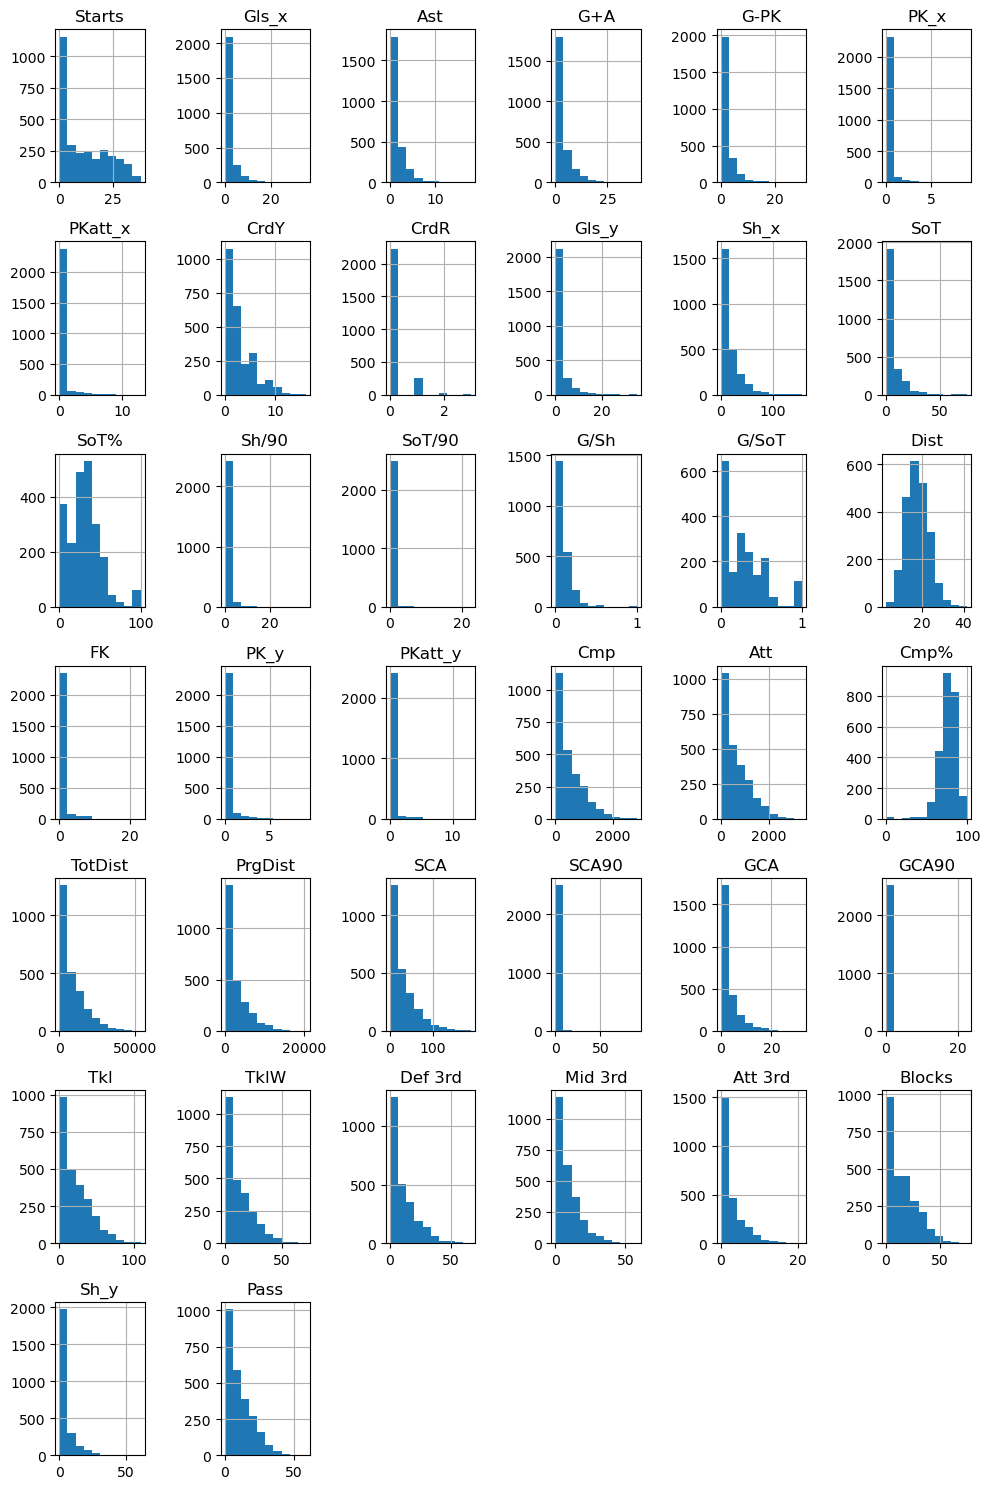

In [15]:
all_data.hist(figsize=(10,15))
plt.tight_layout()

### Inisghts so far 
* From the describe table, we can see there is a discrepancy between the mean and the median for the majority of variables. This suggests that the majority of these variables have a non-Gaussian distribution. This claim is backed up by the histograms which show that nearly all the columns, barring the distance and shots on target % columns, exhibit a power law distribution. 

* This suggests that there are some high performing players, who are obtaining high metrics in each of the features, along with some lower performing players. This is to be expected as not everyone can be Ronaldo or play for Real Madrid. Some teams and players will naturally perform worse than others. We can see that for the majority of metrics, most of the values are between 0 and 1, suggesting that the majority of players are poor performing. 

* We can also see that the majority of the players have between 0 and 1 starts. This is to be expected. These values may need to be removed if it is deemed that they are skewing the model. However I am wary of doing this, as even a player who may not have had a massive number of starts can still have made appearances as a substitute, and thus had impact on games. This is always going to be the case for the majority of players, given that there are only 11 players who can start out of a 30 man squad. Thus, removing these records seems unreasonable. 

* The fact that the data are non-Gaussian means that the median is the better method for imputation as it is more robust to violations in normality than the mean. 

* There are some duplicate columns which will have to be removed from the model as they are reduntant. 

#### 2.4 Imputing Null values

In [16]:
all_data.isna().sum()

Player        0
Pos           2
Age           1
Starts        0
Gls_x       461
Ast         461
G+A         461
G-PK        461
PK_x        461
PKatt_x     461
CrdY        461
CrdR        461
Gls_y       433
Sh_x        433
SoT         433
SoT%        739
Sh/90       433
SoT/90      433
G/Sh        739
G/SoT      1079
Dist        740
FK          436
PK_y        433
PKatt_y     433
Cmp         436
Att         436
Cmp%        449
TotDist     436
PrgDist     436
SCA         436
SCA90       436
GCA         436
GCA90       436
Tkl         436
TklW        433
Def 3rd     436
Mid 3rd     436
Att 3rd     436
Blocks      436
Sh_y        436
Pass        436
dtype: int64

In [17]:
median = all_data.median()
all_data.fillna(median,inplace=True)
all_data

/var/folders/l1/kb_t3jk17fn21h4x3hr3n3ch0000gn/T/ipykernel_35835/3397502985.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = all_data.median()


,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Sh_y,Pass
1,João Cancelo,DF,27.0,36.0,1.0,7.0,8.0,1.0,0.0,0.0,...,18.0,0.50,83.0,54.0,33.0,35.0,15.0,25.0,3.0,22.0
2,Rodri,MF,25.0,33.0,7.0,2.0,9.0,7.0,0.0,0.0,...,6.0,0.19,72.0,43.0,24.0,38.0,10.0,28.0,5.0,23.0
3,Bernardo Silva,"MF,FW",26.0,33.0,8.0,4.0,12.0,8.0,0.0,0.0,...,17.0,0.54,57.0,29.0,19.0,19.0,19.0,24.0,2.0,22.0
4,Aymeric Laporte,DF,27.0,33.0,4.0,0.0,4.0,4.0,0.0,0.0,...,6.0,0.19,33.0,15.0,22.0,10.0,1.0,15.0,10.0,5.0
5,Rúben Dias,DF,24.0,27.0,2.0,4.0,6.0,2.0,0.0,0.0,...,7.0,0.26,26.0,19.0,11.0,12.0,3.0,19.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,Salim Akkal,MF,23-070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,2.0,8.0
3353,Yassin Belkhdim,MF,21-073,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,2.0,8.0
3355,Yacine Gaya,DF,18-164,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,2.0,8.0
3356,Noah Guede-Nadje,MF,19-167,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,2.0,8.0


In [18]:
all_data.columns

Index(['Player', 'Pos', 'Age', 'Starts', 'Gls_x', 'Ast', 'G+A', 'G-PK', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'Gls_y', 'Sh_x', 'SoT', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_y', 'PKatt_y', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'SCA', 'SCA90', 'GCA', 'GCA90',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Blocks', 'Sh_y',
       'Pass'],
      dtype='object')

Drop duplicate columns

In [19]:
all_data.drop(["Gls_y", "PK_y",'PKatt_y','Sh_y'],axis=1,inplace=True)

#### 2.5 Feature Scaling
As the data are all on different scales, they will be standardised to a Z distribution prior to being implemented in the algorithm. This will place the data on a standardised distribution where each value will be represented in terms of a standard deviation.

In [20]:
# Get all the columns bar the Player, Position and Age columns
X = all_data.iloc[:,3:]
X.head()

,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,CrdY,CrdR,Sh_x,...,SCA90,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass
1,36.0,1.0,7.0,8.0,1.0,0.0,0.0,7.0,0.0,81.0,...,3.51,18.0,0.50,83.0,54.0,33.0,35.0,15.0,25.0,22.0
2,33.0,7.0,2.0,9.0,7.0,0.0,0.0,5.0,0.0,45.0,...,2.90,6.0,0.19,72.0,43.0,24.0,38.0,10.0,28.0,23.0
3,33.0,8.0,4.0,12.0,8.0,0.0,0.0,6.0,0.0,47.0,...,4.32,17.0,0.54,57.0,29.0,19.0,19.0,19.0,24.0,22.0
4,33.0,4.0,0.0,4.0,4.0,0.0,0.0,5.0,1.0,35.0,...,1.27,6.0,0.19,33.0,15.0,22.0,10.0,1.0,15.0,5.0
5,27.0,2.0,4.0,6.0,2.0,0.0,0.0,5.0,0.0,18.0,...,1.35,7.0,0.26,26.0,19.0,11.0,12.0,3.0,19.0,6.0


In [21]:
from sklearn.preprocessing import StandardScaler 

# Create a ScandardScaler object 
sc = StandardScaler() 

# Get the required columns 
scaler_columns = X.columns[1:] 

# Scale required columns 
X[scaler_columns] = sc.fit_transform(X[scaler_columns])

X

,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,CrdY,CrdR,Sh_x,...,SCA90,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass
1,36.0,-0.222254,3.105862,1.234955,-0.135368,-0.206594,-0.217732,1.746910,-0.305944,3.642872,...,0.423138,4.017685,0.436911,3.309548,3.760737,2.274571,3.309453,4.275381,0.896151,1.347966
2,33.0,1.823905,0.489564,1.468676,2.122374,-0.206594,-0.217732,0.955806,-0.305944,1.643164,...,0.221206,0.821497,-0.043756,2.722469,2.771725,1.390187,3.679965,2.545964,1.145906,1.460190
3,33.0,2.164931,1.536083,2.169839,2.498664,-0.206594,-0.217732,1.351358,-0.305944,1.754259,...,0.691277,3.751336,0.498933,1.921907,1.512983,0.898862,1.333392,5.658916,0.812899,1.347966
4,33.0,0.800826,-0.556956,0.300071,0.993503,-0.206594,-0.217732,0.955806,2.611837,1.087689,...,-0.318383,0.821497,-0.043756,0.641007,0.254240,1.193657,0.221857,-0.566988,0.063632,-0.559830
5,27.0,0.118773,1.536083,0.767513,0.240922,-0.206594,-0.217732,0.955806,-0.305944,0.143382,...,-0.291900,1.087846,0.064782,0.267412,0.613881,0.112743,0.468865,0.124779,0.396639,-0.447607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3353,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3355,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3356,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160


In [22]:
print(X.shape) 

(2966, 34)


In [23]:
X

,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,CrdY,CrdR,Sh_x,...,SCA90,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass
1,36.0,-0.222254,3.105862,1.234955,-0.135368,-0.206594,-0.217732,1.746910,-0.305944,3.642872,...,0.423138,4.017685,0.436911,3.309548,3.760737,2.274571,3.309453,4.275381,0.896151,1.347966
2,33.0,1.823905,0.489564,1.468676,2.122374,-0.206594,-0.217732,0.955806,-0.305944,1.643164,...,0.221206,0.821497,-0.043756,2.722469,2.771725,1.390187,3.679965,2.545964,1.145906,1.460190
3,33.0,2.164931,1.536083,2.169839,2.498664,-0.206594,-0.217732,1.351358,-0.305944,1.754259,...,0.691277,3.751336,0.498933,1.921907,1.512983,0.898862,1.333392,5.658916,0.812899,1.347966
4,33.0,0.800826,-0.556956,0.300071,0.993503,-0.206594,-0.217732,0.955806,2.611837,1.087689,...,-0.318383,0.821497,-0.043756,0.641007,0.254240,1.193657,0.221857,-0.566988,0.063632,-0.559830
5,27.0,0.118773,1.536083,0.767513,0.240922,-0.206594,-0.217732,0.955806,-0.305944,0.143382,...,-0.291900,1.087846,0.064782,0.267412,0.613881,0.112743,0.468865,0.124779,0.396639,-0.447607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3353,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3355,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3356,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160


## 3. Applying the Algorithm 

#### 3.1 PCA 
There are 34 features in the dataset. This has the potential to make the intepretation difficult. One way of correcting this issue is performing a Principal Components Analysis (PCA), which is a dimension reduction method that can reduce a dataset to its principal components. It is another form of unsupervised ML algorithm that works by performing an Eigendecomposition on a covariance matrix. Principal components are eigenvectors, scaled by their eigenvalues which denote the variance of the data they can explain. 

For the purpose of this project, the data were reduced to 2 principal components. This is a common method in the literature of performing cluster analysis on football data. 

It is worth noting that performing PCA on data prior to clustering may have an effect on the clusters. However, the decision to implement PCA was taken given its prevalance in the relevant literature. 

In [24]:
# Using PCA to reduce dimensionality of the features. 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [25]:
# View the array of features that was reduced from 51 to 2 using PCA 
principalComponents1

array([[ 27.3372324 ,  -0.87531073],
       [ 23.79863584,  -1.19657723],
       [ 23.40674972,   2.78356607],
       ...,
       [-11.1803002 ,  -0.27991709],
       [-11.1803002 ,  -0.27991709],
       [-11.1803002 ,  -0.27991709]])

In [26]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,27.337232,-0.875311
1,23.798636,-1.196577
2,23.406750,2.783566
3,22.799001,-3.101113
4,16.540306,-2.119352


<Figure size 640x480 with 0 Axes>

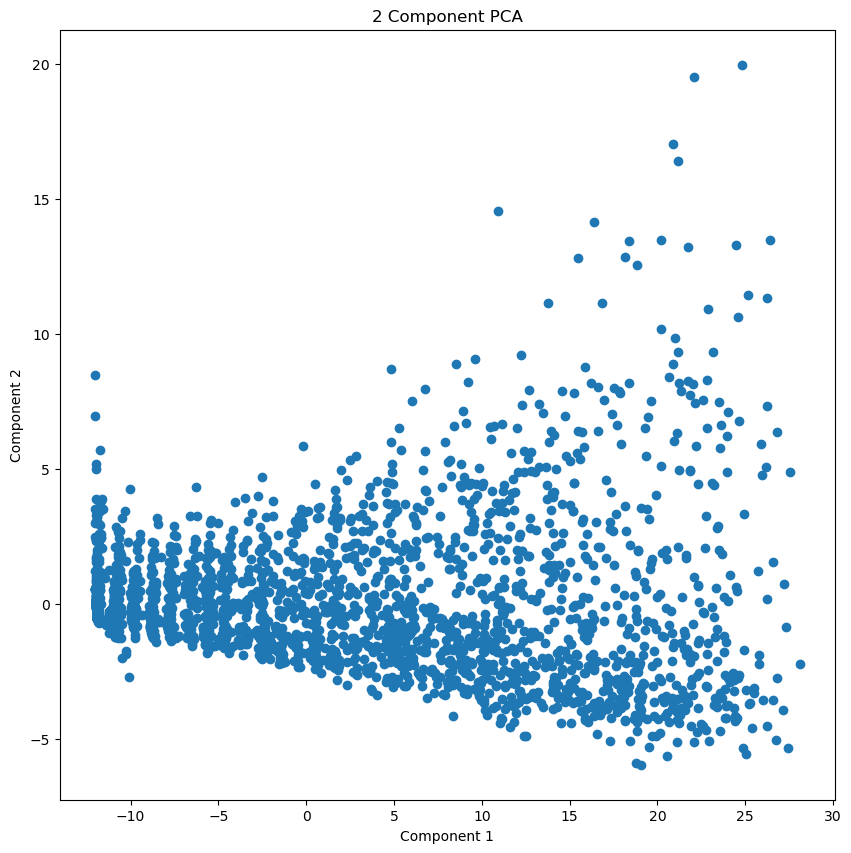

In [27]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) #c = y_kmeans, s=10)
plt.show()

#### 3.1 Setting the value for K. 
K is the number of clusters required in the algorithm. The value for K can be set based on human decision, however, domain knowledge is important when doing so. There are four main spatial positions in football, Goalkeeper, Defense, Midfield and Attack. Based on this, four clusters would be logical. However, modern football tactics have deviated from traditional concepts of what the role of a specific position should be. A good example of this is modern full backs, who often play in more offensive roles, despite still being defenders. Thus, deciding on four clusters apriori may not be suitable, but is a good starting point for having an idea of how many clusters there should be. 

The silhouette method is a common method to use for determining the ideal number of clusters, should using purely domain knowledge not be the most suitable. 

In [28]:
from sklearn.cluster import KMeans

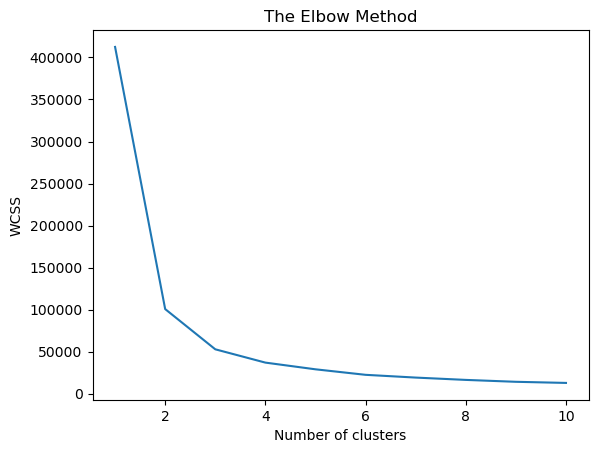

None


In [29]:
#Apply Elbow method and calculate : Using K-means++
wcss = []
K = range(1,11)
for i in K:
    # kmeanModel = KMeans(n_clusters=k)
    # kmeanModel.fit(df)
    # wcss.append(kmeanModel.inertia_)
    
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(PCA_dataset1)
    wcss.append(kmeans.inertia_)

#Plot the Elbow chart
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
print(plt.show())

It appears that based on the above elbow graph, that three clusters appears to be the optimal k value. This is not surprising given that the majority of players in the dataset will consist of defense, midfield and attack. There are goalkeepers present, however the data collected may not be optimal analysing keepers. 

#### 3.2 Implementing the algorithm 

In [30]:
# Implementing the K Means Clustering Algorithm and specifying the number of clusters needed.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
all_data

,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,SCA90,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass
1,João Cancelo,DF,27.0,36.0,1.0,7.0,8.0,1.0,0.0,0.0,...,3.51,18.0,0.50,83.0,54.0,33.0,35.0,15.0,25.0,22.0
2,Rodri,MF,25.0,33.0,7.0,2.0,9.0,7.0,0.0,0.0,...,2.90,6.0,0.19,72.0,43.0,24.0,38.0,10.0,28.0,23.0
3,Bernardo Silva,"MF,FW",26.0,33.0,8.0,4.0,12.0,8.0,0.0,0.0,...,4.32,17.0,0.54,57.0,29.0,19.0,19.0,19.0,24.0,22.0
4,Aymeric Laporte,DF,27.0,33.0,4.0,0.0,4.0,4.0,0.0,0.0,...,1.27,6.0,0.19,33.0,15.0,22.0,10.0,1.0,15.0,5.0
5,Rúben Dias,DF,24.0,27.0,2.0,4.0,6.0,2.0,0.0,0.0,...,1.35,7.0,0.26,26.0,19.0,11.0,12.0,3.0,19.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,Salim Akkal,MF,23-070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.92,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0
3353,Yassin Belkhdim,MF,21-073,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.92,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0
3355,Yacine Gaya,DF,18-164,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.92,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0
3356,Noah Guede-Nadje,MF,19-167,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.92,2.0,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0


In [32]:
post_clustered_data = all_data

In [33]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

# Add the principal components and the k-means cluster values to X 
post_clustered_data['Principal Component 1'] = principal_component1
post_clustered_data['Principal Component 2'] = principal_component2
post_clustered_data['PCA Cluster'] = y_kmeans

post_clustered_data

,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass,Principal Component 1,Principal Component 2,PCA Cluster
1,João Cancelo,DF,27.0,36.0,1.0,7.0,8.0,1.0,0.0,0.0,...,83.0,54.0,33.0,35.0,15.0,25.0,22.0,23.798636,-1.196577,2
2,Rodri,MF,25.0,33.0,7.0,2.0,9.0,7.0,0.0,0.0,...,72.0,43.0,24.0,38.0,10.0,28.0,23.0,23.406750,2.783566,2
3,Bernardo Silva,"MF,FW",26.0,33.0,8.0,4.0,12.0,8.0,0.0,0.0,...,57.0,29.0,19.0,19.0,19.0,24.0,22.0,22.799001,-3.101113,2
4,Aymeric Laporte,DF,27.0,33.0,4.0,0.0,4.0,4.0,0.0,0.0,...,33.0,15.0,22.0,10.0,1.0,15.0,5.0,16.540306,-2.119352,2
5,Rúben Dias,DF,24.0,27.0,2.0,4.0,6.0,2.0,0.0,0.0,...,26.0,19.0,11.0,12.0,3.0,19.0,6.0,15.868631,8.764142,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,Salim Akkal,MF,23-070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17.0,10.0,7.0,6.0,2.0,12.0,8.0,NaN,NaN,1
3353,Yassin Belkhdim,MF,21-073,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17.0,10.0,7.0,6.0,2.0,12.0,8.0,NaN,NaN,1
3355,Yacine Gaya,DF,18-164,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17.0,10.0,7.0,6.0,2.0,12.0,8.0,NaN,NaN,1
3356,Noah Guede-Nadje,MF,19-167,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17.0,10.0,7.0,6.0,2.0,12.0,8.0,NaN,NaN,1


In [34]:
import plotly.express as px 

# Change the "Cluster" column to a string to make the labelling more appealing 
post_clustered_data['PCA Cluster'] = post_clustered_data['PCA Cluster'].astype(str)

fig = px.scatter(post_clustered_data,x='Principal Component 1',y='Principal Component 2',color='PCA Cluster',hover_data=['PCA Cluster','Player','Pos'])
fig.update_traces(textposition='top center')
fig.update_layout(width=1400,height=800)
fig.show()

From the above graph, we can see that the clusters are not clearly defined, with the majority of data points overlapping. There is not much potential for analysing distinct clusters based on these data. 

Visually, there does appear to be potential for clusters, however the algorithm does a poor job of identifying these. There also appears to be a lot of noise when the data are graphed. One potential solution to salvage an analysis from these data is to peform Dbscan. As dbscan is entirely based on local distances, there is the potential to establish more well defined clusters that can control for the level of noise in the dataset. One potential downside of this method is dbscan's extreme sensitivity to clusters differences in scaling. However, the effect of this will not be seen until the algorithm is run. 

### 3.3 DBSCAN
This algorithm will also be performed on the first two principal components

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # Used to calculate optimal epsilon value 

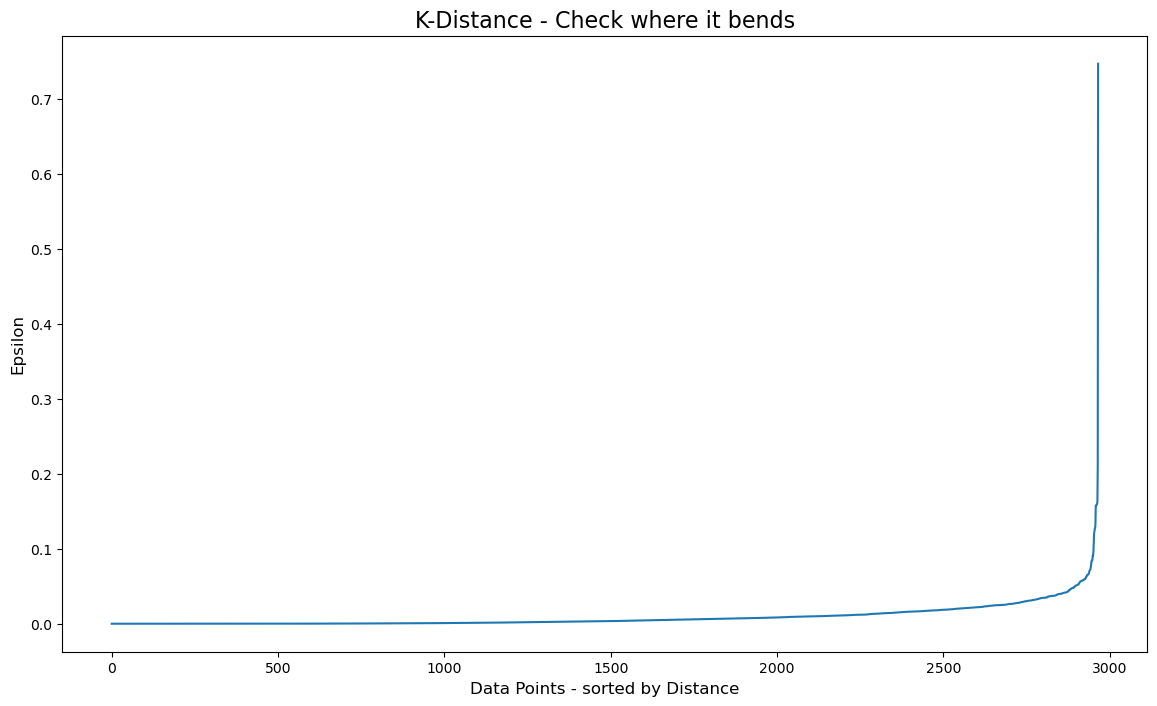

In [36]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_dataset1[['component1','component1']])
distances, indices = nbrs.kneighbors(PCA_dataset1[['component1','component1']])

# Plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

In [37]:
dbscan_opt=DBSCAN(eps=.01,min_samples=3)
dbscan_opt.fit(PCA_dataset1[['component1','component1']])

DBSCAN(eps=0.01, min_samples=3)

In [38]:
post_clustered_data['DBSCAN_labels'] = dbscan_opt.labels_

In [39]:
post_clustered_data['DBSCAN_labels'].value_counts() 

-1      1354
 4       432
 3       301
 2        92
 10       28
        ... 
 66        3
 65        3
 64        3
 169       3
 163       3
Name: DBSCAN_labels, Length: 176, dtype: int64

In [40]:
# Change the "Cluster" column to a string to make the labelling more appealing 
post_clustered_data['DBSCAN_labels'] = post_clustered_data['DBSCAN_labels'].astype(str)

fig = px.scatter(post_clustered_data,x='Principal Component 1',y='Principal Component 2',color='DBSCAN_labels',hover_data=['DBSCAN_labels','Player','Pos'])
fig.update_traces(textposition='top center')
fig.update_layout(width=1400,height=800)
fig.show()

So, based on the above data, there appears to be no well defined clusters. There is potential that this result is caused by the PCA. 

### Performing the Algorithm wihthout Dimension Reduction 
There is a possibility that the Principal Components Analysis is effecting the clusters. Performing the K-means algorithm on the raw data could potentially yield different results. The downside of this method is that the data will be impossible to visualise due to their high dimensionality. 

However, the clusters can be analysed individually to see what type of players they contain. This can include examining individual players in specific clusters and making inferences about the cluster based on what is known about their playing style, alongside descriptive statistics on key performance metrics 

In [41]:
X

,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,CrdY,CrdR,Sh_x,...,SCA90,GCA,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass
1,36.0,-0.222254,3.105862,1.234955,-0.135368,-0.206594,-0.217732,1.746910,-0.305944,3.642872,...,0.423138,4.017685,0.436911,3.309548,3.760737,2.274571,3.309453,4.275381,0.896151,1.347966
2,33.0,1.823905,0.489564,1.468676,2.122374,-0.206594,-0.217732,0.955806,-0.305944,1.643164,...,0.221206,0.821497,-0.043756,2.722469,2.771725,1.390187,3.679965,2.545964,1.145906,1.460190
3,33.0,2.164931,1.536083,2.169839,2.498664,-0.206594,-0.217732,1.351358,-0.305944,1.754259,...,0.691277,3.751336,0.498933,1.921907,1.512983,0.898862,1.333392,5.658916,0.812899,1.347966
4,33.0,0.800826,-0.556956,0.300071,0.993503,-0.206594,-0.217732,0.955806,2.611837,1.087689,...,-0.318383,0.821497,-0.043756,0.641007,0.254240,1.193657,0.221857,-0.566988,0.063632,-0.559830
5,27.0,0.118773,1.536083,0.767513,0.240922,-0.206594,-0.217732,0.955806,-0.305944,0.143382,...,-0.291900,1.087846,0.064782,0.267412,0.613881,0.112743,0.468865,0.124779,0.396639,-0.447607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3353,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3355,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160
3356,0.0,-0.222254,-0.556956,-0.401092,-0.511658,-0.206594,-0.217732,-0.230850,-0.305944,-0.300998,...,-0.103209,-0.243899,-0.121283,-0.212925,-0.195311,-0.280317,-0.272158,-0.221104,-0.186124,-0.223160


#### Establishing optimal k-value 
The elbow method, used above, can be useful for determining the optimal k-value in the absence of domain knowledge. However, in this situation we can apply domain knowledge, and assume that there are three distinct clusters in these data. 

* Defenders 
* Midfielders
* Attackers 

There will be some overlap. For example, there can be central defensive midfielders such as Joshua Kimmich, who's playing style may resemble more of a defender. There may also be central attacking midfielders or wingers such as Kevin De Bruyne who's playing style may be clusterd with attackers. 

In [42]:
# Implementing the K Means Clustering Algorithm and specifying the number of clusters needed.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
non_pca_kmeans = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [43]:
all_data['Cluster'] = non_pca_kmeans
# all_data.drop(["Principal Component 1","Principal Component 2","DBSCAN_labels"],axis=1,inplace=True)
all_data.iloc[:,3:] = all_data.iloc[:,3:].astype(float)

/var/folders/l1/kb_t3jk17fn21h4x3hr3n3ch0000gn/T/ipykernel_35835/3112055408.py:3: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [44]:
all_data.drop(["Principal Component 1","Principal Component 2","DBSCAN_labels"],axis=1,inplace=True)

In [45]:
all_data

,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass,PCA Cluster,Cluster
1,João Cancelo,DF,27.0,36.0,1.0,7.0,8.0,1.0,0.0,0.0,...,0.50,83.0,54.0,33.0,35.0,15.0,25.0,22.0,2.0,1.0
2,Rodri,MF,25.0,33.0,7.0,2.0,9.0,7.0,0.0,0.0,...,0.19,72.0,43.0,24.0,38.0,10.0,28.0,23.0,2.0,1.0
3,Bernardo Silva,"MF,FW",26.0,33.0,8.0,4.0,12.0,8.0,0.0,0.0,...,0.54,57.0,29.0,19.0,19.0,19.0,24.0,22.0,2.0,1.0
4,Aymeric Laporte,DF,27.0,33.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.19,33.0,15.0,22.0,10.0,1.0,15.0,5.0,2.0,1.0
5,Rúben Dias,DF,24.0,27.0,2.0,4.0,6.0,2.0,0.0,0.0,...,0.26,26.0,19.0,11.0,12.0,3.0,19.0,6.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,Salim Akkal,MF,23-070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0,1.0,2.0
3353,Yassin Belkhdim,MF,21-073,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0,1.0,2.0
3355,Yacine Gaya,DF,18-164,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0,1.0,2.0
3356,Noah Guede-Nadje,MF,19-167,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.14,17.0,10.0,7.0,6.0,2.0,12.0,8.0,1.0,2.0


### Analysis of Cluster 0 

In [46]:
cluster0 = all_data[all_data['Cluster']==0]
print(cluster0.shape)
cluster0.head()

(799, 39)


,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass,PCA Cluster,Cluster
11,İlkay Gündoğan,MF,30.0,20.0,8.0,4.0,12.0,8.0,0.0,0.0,...,0.44,23.0,9.0,10.0,12.0,1.0,11.0,10.0,0.0,0.0
12,Kyle Walker,DF,31.0,20.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.21,15.0,6.0,7.0,7.0,1.0,14.0,10.0,0.0,0.0
13,Riyad Mahrez,FW,30.0,15.0,11.0,5.0,16.0,7.0,4.0,5.0,...,0.60,11.0,3.0,5.0,4.0,2.0,15.0,14.0,0.0,0.0
14,John Stones,DF,27.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.08,5.0,3.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0
15,Oleksandr Zinchenko,DF,24.0,10.0,0.0,4.0,4.0,0.0,0.0,0.0,...,0.95,20.0,14.0,7.0,10.0,3.0,11.0,8.0,0.0,0.0


What position is the most common?

In [47]:
cluster0['Pos'].value_counts()

DF       284
MF       174
FW        96
FW,MF     89
MF,FW     81
DF,MF     31
MF,DF     18
DF,FW     18
FW,DF      8
Name: Pos, dtype: int64

In [48]:
cluster0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Starts,799.0,14.846058,3.817921,8.00,12.000,15.00,18.00,22.00
Gls_x,799.0,1.832290,2.381930,0.00,0.000,1.00,3.00,15.00
Ast,799.0,1.331665,1.569249,0.00,0.000,1.00,2.00,13.00
G+A,799.0,3.163955,3.280443,0.00,1.000,2.00,5.00,24.00
G-PK,799.0,1.670839,2.147573,0.00,0.000,1.00,2.00,15.00
PK_x,799.0,0.161452,0.635394,0.00,0.000,0.00,0.00,6.00
PKatt_x,799.0,0.196496,0.713414,0.00,0.000,0.00,0.00,7.00
CrdY,799.0,3.073842,2.118259,0.00,2.000,3.00,4.00,11.00
CrdR,799.0,0.138924,0.377267,0.00,0.000,0.00,0.00,2.00
Sh_x,799.0,17.797247,13.757347,0.00,7.000,14.00,25.00,78.00


### Analysis of Cluster 1 

In [49]:
cluster1 = all_data[all_data['Cluster']==1]
print(cluster1.shape)
cluster1.head()

(679, 39)


,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass,PCA Cluster,Cluster
1,João Cancelo,DF,27.0,36.0,1.0,7.0,8.0,1.0,0.0,0.0,...,0.50,83.0,54.0,33.0,35.0,15.0,25.0,22.0,2.0,1.0
2,Rodri,MF,25.0,33.0,7.0,2.0,9.0,7.0,0.0,0.0,...,0.19,72.0,43.0,24.0,38.0,10.0,28.0,23.0,2.0,1.0
3,Bernardo Silva,"MF,FW",26.0,33.0,8.0,4.0,12.0,8.0,0.0,0.0,...,0.54,57.0,29.0,19.0,19.0,19.0,24.0,22.0,2.0,1.0
4,Aymeric Laporte,DF,27.0,33.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.19,33.0,15.0,22.0,10.0,1.0,15.0,5.0,2.0,1.0
5,Rúben Dias,DF,24.0,27.0,2.0,4.0,6.0,2.0,0.0,0.0,...,0.26,26.0,19.0,11.0,12.0,3.0,19.0,6.0,2.0,1.0


In [50]:
cluster1['Pos'].value_counts()

DF       278
MF       185
FW        82
MF,FW     49
FW,MF     44
MF,DF     14
DF,MF     13
DF,FW     11
FW,DF      3
Name: Pos, dtype: int64

In [51]:
cluster1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Starts,679.0,27.883652,4.245388,21.00,24.00,28.00,31.000,38.00
Gls_x,679.0,3.829161,4.721785,0.00,1.00,2.00,5.000,35.00
Ast,679.0,2.683358,2.838038,0.00,0.00,2.00,4.000,18.00
G+A,679.0,6.512518,6.479107,0.00,2.00,4.00,9.000,39.00
G-PK,679.0,3.435935,4.148597,0.00,1.00,2.00,5.000,30.00
PK_x,679.0,0.393225,1.147017,0.00,0.00,0.00,0.000,9.00
PKatt_x,679.0,0.505155,1.404655,0.00,0.00,0.00,0.000,13.00
CrdY,679.0,5.141384,2.933990,0.00,3.00,5.00,7.000,16.00
CrdR,679.0,0.243004,0.507908,0.00,0.00,0.00,0.000,3.00
Sh_x,679.0,32.779087,24.502088,1.00,14.00,25.00,45.000,156.00


### Analysis of Cluster 2

In [52]:
cluster2 = all_data[all_data['Cluster']==2]
print(cluster2.shape)
cluster2.head()

(1488, 39)


,Player,Pos,Age,Starts,Gls_x,Ast,G+A,G-PK,PK_x,PKatt_x,...,GCA90,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Blocks,Pass,PCA Cluster,Cluster
18,Ferrán Torres,FW,21.0,4.0,2.0,1.0,3.0,2.0,0.0,0.0,...,0.59,2.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0
19,Cole Palmer,"FW,MF",19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.73,2.0,1.0,1.0,1.0,0.0,3.0,3.0,1.0,2.0
21,Benjamin Mendy,DF,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
22,James Mcatee,"MF,FW",18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
23,Liam Delap,FW,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [53]:
cluster2['Pos'].value_counts()

DF       443
MF       398
FW       256
FW,MF    152
MF,FW    108
DF,MF     57
DF,FW     29
MF,DF     29
FW,DF     14
Name: Pos, dtype: int64

In [54]:
cluster2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Starts,1488.0,1.706317,2.413627,0.0,0.0000,0.00,3.0000,8.0
Gls_x,1488.0,0.561156,0.753577,0.0,0.0000,0.00,1.0000,6.0
Ast,1488.0,0.182124,0.526145,0.0,0.0000,0.00,0.0000,5.0
G+A,1488.0,0.743280,1.007682,0.0,0.0000,1.00,1.0000,7.0
G-PK,1488.0,0.245296,0.708042,0.0,0.0000,0.00,0.0000,6.0
PK_x,1488.0,0.006048,0.085795,0.0,0.0000,0.00,0.0000,2.0
PKatt_x,1488.0,0.009409,0.115591,0.0,0.0000,0.00,0.0000,2.0
CrdY,1488.0,1.153226,1.118730,0.0,0.0000,1.00,2.0000,8.0
CrdR,1488.0,0.023522,0.155977,0.0,0.0000,0.00,0.0000,2.0
Sh_x,1488.0,6.219758,6.768193,0.0,1.0000,5.00,10.0000,92.0


### Insights on the three clusters
There are too many features to analyse each one and how it effects each cluster. There are, however, some key performance indicators (KPI's) that aptly describe the nature of each cluster. These are goals, assists, shots created and tackles won. These metrics allow for the formation of clear distinctions between attacking and defensive playing styles. 

There are three distinct clusters according to these metrics. 
1. Cluster 0 - High Performing Attacking Players 
2. Cluster 1 - Average/Poor Performing Players from both Defense and Attack
3. Cluster 3 - High Performing Defensive Players 

##### Cluster 0:
* The first cluster appears to contain high performing, attack focused players. The majority of the players are forwards (115). There are a significant amount of players who play in both forward and midifeld (FW,MF = 70, MF,FW = 59), and the remainder are pure midfielders (45). There are only 10 defenders in this cluster. 
* Cluster 0 has the highest median goals scored ($Med = 7$), as well as a small interquartile range for goals scores ($IQR = 5$). This suggests relative consistency in goal scoring through the entirity of the cluster. It is also worth noting that the max number of goals in the sample is included in this cluster ($Max = 35$). 
* The same applies for assists, with this cluster containing the highes performing players in this metric among the three clusters. The median assists is relatively low ($Med = 4$). However, the interquartile range is also quite low ($IQR=4$), suggesting consistency throughout the sample. Again, the max in this cluster is the highest of the three for assists ($Max=18$). 
* The shots created for this cluster is very high ($Med = 73.5$), with an extremely high max ($Max = 188$)
* Defensively, in comparison, this cluster appears to be performing poorly. The median tackles won is quite low ($Med = 14$), suggesting that the strengths for this cluster appear to lie in goal scoring and goal creation. 

##### Cluster 1: 
* The second cluster contains average/poorly performing players for both midfield and defense. This is the largest cluster by far with 1922 records. The majority of players are defenders (605), with pure midfielders making up 473 records and forwards making up 316. The rest of the records are made up of combination players, e.g. players who play as both midfielders and defenders.   
* The median goals scored for this cluster is 0. The max amount of goals scored is also low ($Max=8$)
* The median amount of assists = 0, with a max of 6. 
* The low creativity of this group is shown through the low median value for shots created ($Med=13$)
* Defensively, this group performs worse than even the pure attacking players contained in cluster 0, with a median of 6 shots tackles won, compared with 13 of cluster 0. 

##### Cluster 2: 
* The third cluster contains majority defenders (390) and defensively focused midfielders (239). 
* The median goals for this group is small ($Med=1$). The median assists is also small ($Med=1$). 
* This cluster has a decent level of creativity with a median shots created of 37. This is to be expected, as the majority of defenders and defensive midfielders in the modern game are heavily involved in build-up play. 
* Defensively, this cluster is by far the best performing, with a median of 24 tackles won, and a very high max number of tackles won ($Max=71$).

### Benefits of such a model for teams/analysts/scouts

1. This model is based on the five highest-performing leagues in world football. On a macro level, this gives a good insight into how players in these leagues perform compared to others. For example, most Man City players, the best performing club in England, have attack-focused players (e.g., Bernardo Silva) in cluster 0 and defence-focused players (e.g., Rodri) in cluster 2. Thus, managerial teams can use these models to evaluate how players perform compared to other high-performing players in their particular position. This can be used in conjunction with reviewing in-game and training footage to add a quantitative basis for managerial decisions. These decisions are vital for all aspects of the game, e.g., making tactical substitutions in response to conceding a goal, deciding who to replace injured players with, etc. This adds another dimension to models that cluster the playing styles of entire teams as a whole, such as that from Hei Ho & McKinley( 2019). Both types should be used for a detailed view of team processes. 

2. Alongside team decisions, this model can be used to make informed transfer decisions. Teams can compare how transfer targets fit into each cluster. There is often media hype around certain players, which can increase their transfer price. With this model, lower-performing or more fiscally conscious teams can buy players who may be cheaper but can still meet the performance requirements of the highest-performing players in their position. This is vital for clubs that have a smaller budget.  
 
3. As was shown by Batra (2022) on Basketball data, there is potential to establish archetypes of players who fit a specific playing style using clustering methods when dividing the infield data into defensive players and more attacking players. ABHISH92_SME (2020), in his Kaggle project, was successful in doing this on football data, but the model was only focused on goals and assists. The model in this project is multivariate and encompasses metrics vital to all aspects of the game. From it, we can see the archetypal dynamic attacker, the solid defender, and the average team player. But at the end of the day, not everyone can be Messi. The archetypes formed from this model can create a quantitative basis for punditry. Still, they can also span many industries, such as gaming (player ratings in Fifa) and betting (determining odds for specific actions).  

## References 
ABHISH92_SME. (2020). KMean clustering on Football Player(Season 19-20). Retrieved April 27, 2023, from https://kaggle.com/code/abhish92sme/    kmean-clustering-on-football-player-season-19-20

Akif Md Ali, M. F., Muhalith, M. A. F., Sahran, M. S. F., Zubli, Z. Q., Kamarudin, S. N. K., & Rahman, S. A. (2022). Clustering in Game Analysis on FIFA22 Official Players 

Data. 2022 3rd International Conference on Artificial Intelligence and Data Sciences (AiDAS), 49–54. https://doi.org/10.1109/AiDAS56890.2022.9918708

Batra, A. (2022, July 23). Generating NBA Archetypes Using K-Means Clustering. Best Ball Stats. https://bestballstats.com/2022/07/23/generating-nba-archetypes-using-k-means-clustering/

Hei Ho, C., & McKinley, E. (2019, March 11). Using k-means to learn what soccer passing tells us about playing styles. American Soccer Analysis.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://www.americansocceranalysis.com/home/2019/3/11/using-k-means-to-learn-what-soccer-passing-tells-us-about-playing-styles

Soto-Valero, C. (2017). A Gaussian mixture clustering model for characterizing football players using the EA Sports’ FIFA video game system. RICYDE. Revista Internacional de Ciencias Del Deporte, 13, 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;244–259. https://doi.org/10.5232/ricyde2017.04904